In [ ]:
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nbconvert
from scipy.stats import ttest_ind,ttest_rel
from scipy.stats import ttest_ind,ttest_rel
import researchpy as rp
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_csv =  sorted(str(p) for p in pathlib.Path("C:/Users/opolezh/Desktop/Paris Saclay/These/4_DATA/data_exp_1/0_data_raw").glob("*.csv"))
print(len(data_csv))
# data_csv = data_csv[0]
data_csv

##  Data initial  + stat

In [ ]:
def calcul_stat (data_csv):
    data_list = []
    for elem in data_csv:
        df = pd.read_csv(elem, header=0)
        df_new  = df.drop(columns=['fix_start_time','dot_mvt_start_time','last_dot_time',
                                  'button_pressed_time','line_cross_time','rest_time','end_time','start_exp_time',
                                  'time_from_start [ces]','early_response (t/f)'])
        prop_left = []
        for elem in df_new['response']:
            if elem  == 1: # right
                prop_left.append(0)  # if right == true 0
            else: # -1 left
                prop_left.append(1) # if right
        df_new.loc[:, "prop_left"] = prop_left
        data_list.append(df_new)
    return data_list

In [ ]:
data_list = calcul_stat (data_csv)
data_list[-2]

In [ ]:
def make_data_list (data_list):
    for k in range(len(data_list)) :
        exept_prop_left_lv = [] # expected_prop_left (rdw as last visible point)
        exept_prop_left_ms = [] # expected_prop_left (rdw as mean side)

        acc_lv = []
        acc_ms  = []
        condition = []
        conditions = []
        same_side_as_lv = [] # 
        same_side_as_ms = []
        
        for i in range(data_list[k].shape[0]):
                if data_list[k]['last_visibl_side'][i] == 'left' and data_list[k]['prop_left'][i] == 1:
                    same_side_as_lv.append(1)
                if data_list[k]['last_visibl_side'][i] == 'left' and data_list[k]['prop_left'][i] == 0:
                    same_side_as_lv.append(0)
                if data_list[k]['last_visibl_side'][i] == 'right' and data_list[k]['prop_left'][i] == 0:
                    same_side_as_lv.append(1)
                if data_list[k]['last_visibl_side'][i] == 'right' and data_list[k]['prop_left'][i] == 1:
                    same_side_as_lv.append(0)

                if data_list[k]['mean_side'][i] == 'left' and data_list[k]['prop_left'][i] == 1:
                    same_side_as_ms.append(1)
                if data_list[k]['mean_side'][i] == 'left' and data_list[k]['prop_left'][i] == 0:
                    same_side_as_ms.append(0)
                if data_list[k]['mean_side'][i] == 'right' and data_list[k]['prop_left'][i] == 0:
                    same_side_as_ms.append(1)
                if data_list[k]['mean_side'][i] == 'right' and data_list[k]['prop_left'][i] == 1:
                    same_side_as_ms.append(0)
    
    
                if data_list[k]['mean_side'][i] =='left' and data_list[k]['last_visibl_side'][i] == 'left':
                    conditions.append('LL')
                if data_list[k]['mean_side'][i] =='left' and data_list[k]['last_visibl_side'][i] == 'right':
                    conditions.append('LR')
                if data_list[k]['mean_side'][i] =='right' and data_list[k]['last_visibl_side'][i] == 'left':
                    conditions.append('RL')
                if data_list[k]['mean_side'][i] =='right' and data_list[k]['last_visibl_side'][i] == 'right':
                    conditions.append('RR')
                    
                if data_list[k]['mean_side'][i] =='left' and data_list[k]['last_visibl_side'][i] == 'left':
                    condition.append('same')
                if data_list[k]['mean_side'][i] =='left' and data_list[k]['last_visibl_side'][i] == 'right':
                    condition.append('different')
                if data_list[k]['mean_side'][i] =='right' and data_list[k]['last_visibl_side'][i] == 'left':
                    condition.append('different')
                if data_list[k]['mean_side'][i] =='right' and data_list[k]['last_visibl_side'][i] == 'right':
                    condition.append('same')
                # expected_prop_left (rdw as last visible point)
                if data_list[k]['path'][i] =='rdw' and data_list[k]['last_visibl_side'][i] == 'left':
                    exept = 1
                    exept_prop_left_lv.append(exept)
                    if data_list[k]['prop_left'][i] == exept:
                        acc_lv.append(1)  
                    else :  
                        acc_lv.append(0)

                elif data_list[k]['path'][i] =='rdw' and data_list[k]['last_visibl_side'][i] == 'right':
                    exept = 0
                    exept_prop_left_lv.append(exept)
                    if data_list[k]['prop_left'][i] == exept:
                        acc_lv.append(1)  
                    else :  
                        acc_lv.append(0)

                elif data_list[k]['path'][i] =='iid' and data_list[k]['mean_side'][i] == 'left':
                    exept = 1
                    exept_prop_left_lv.append(exept)
                    if data_list[k]['prop_left'][i] == exept:
                        acc_lv.append(1)  
                    else :  
                        acc_lv.append(0)
                elif data_list[k]['path'][i] =='iid' and data_list[k]['mean_side'][i] == 'right':
                    exept = 0
                    exept_prop_left_lv.append(exept)
                    if data_list[k]['prop_left'][i] == exept:
                        acc_lv.append(1)  
                    else :  
                        acc_lv.append(0)
               # expected_prop_left (rdw as mean side)     
                if data_list[k]['path'][i] =='rdw' and data_list[k]['mean_side'][i] == 'left':
                    exept = 1
                    exept_prop_left_ms.append(exept)
                    if data_list[k]['prop_left'][i] == exept:
                        acc_ms.append(1)  
                    else :  
                        acc_ms.append(0)           
                elif data_list[k]['path'][i] =='rdw' and data_list[k]['mean_side'][i] == 'right':
                    exept = 0
                    exept_prop_left_ms.append(exept)
                    if data_list[k]['prop_left'][i] == exept:
                        acc_ms.append(1)  
                    else :  
                        acc_ms.append(0) 
                elif data_list[k]['path'][i] =='iid' and data_list[k]['mean_side'][i] == 'left':
                    exept = 1
                    exept_prop_left_ms.append(exept)
                    if data_list[k]['prop_left'][i] == exept:
                        acc_ms.append(1)  
                    else :  
                        acc_ms.append(0) 
                elif data_list[k]['path'][i] =='iid' and data_list[k]['mean_side'][i] == 'right':
                    exept = 0
                    exept_prop_left_ms.append(exept)
                    if data_list[k]['prop_left'][i] == exept:
                        acc_ms.append(1)  
                    else :  
                        acc_ms.append(0) 
        data_list[k]['RT_s'] = data_list[k]['RT']/1000 # add colums RT in ms   
        data_list[k].drop(columns=['trial','RT'],inplace=True)

    #     data_clean_list[k].drop(columns=['trial','mean_val','sd','last_visibl_center_dist[deg]','f_missing_pos','RT'],inplace=True)    

        data_list[k].insert(0, "# subj", np.ones(len(data_list[k]), dtype=int)*int(k), True)
        data_list[k].insert(3, "conditions", conditions, True)
        data_list[k].insert(4, "condition", condition, True)

#         data_list[k]["exept_prop_left_lv"] = exept_prop_left_lv
        data_list[k]["acc_lv"] = acc_lv
        data_list[k]["same_side_as_lv"] = same_side_as_lv
        data_list[k]["same_side_as_ms"] = same_side_as_ms
    
#         data_list[k]["exept_prop_left_ms"] = exept_prop_left_ms
#         data_list[k]["acc_ms"] = acc_ms  
        cond_sum = []
        for i in range(data_list[k].shape[0]):
                if data_list[k]['path'][i] =='iid' and data_list[k]['condition'][i] == 'same':
                    cond_sum.append('iid_same')
                if data_list[k]['path'][i] =='iid' and data_list[k]['condition'][i] == 'different':
                    cond_sum.append('iid_different')


                if data_list[k]['path'][i] =='rdw' and data_list[k]['condition'][i] == 'same':
                    cond_sum.append('rdw_same')
                if data_list[k]['path'][i] =='rdw' and data_list[k]['condition'][i] == 'different':
                    cond_sum.append('rdw_different')

        data_list[k].insert(5, "cond_sum", cond_sum, True)
    return data_list

In [ ]:
data_list = make_data_list (data_list)
data_list[-1]

##  Suprimer des anomalies IQR method

####  Find the first quartile, Q1.

#### Find the third quartile, Q3.
#### Calculate the IQR. IQR= Q3-Q1.
#### Define the normal data range with lower limit as Q1–1.5*IQR and upper limit as Q3+1.5*IQR.

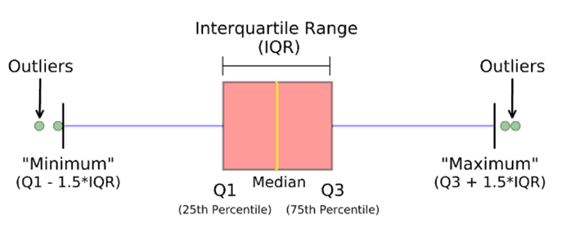

In [ ]:
def remove_anomaly_IQR(data_list):
    data_clean_list = []
    for elem in data_list:
        df = elem
        up_rdw = df.groupby("path")['RT_s'].quantile(0.75)[1] +1.5*(df.groupby("path")['RT_s'].quantile(0.75)[1]-df.groupby("path")['RT_s'].quantile(0.25)[1])
        up_iid= df.groupby("path")['RT_s'].quantile(0.75)[0] +1.5*(df.groupby("path")['RT_s'].quantile(0.75)[0]-df.groupby("path")['RT_s'].quantile(0.25)[0])
        
        df.loc[(df['path'] == 'rdw') & (df['RT_s'] > up_rdw), 'RT_s'] = df.groupby("path")['RT_s'].median()[1]
        df.loc[(df['path'] == 'iid') & (df['RT_s'] > up_iid), 'RT_s'] = df.groupby("path")['RT_s'].median()[0]
        data_clean_list.append(df)
    return data_clean_list       

In [ ]:
data_clean_list = remove_anomaly_IQR(data_list)
data_clean_list[-1]

In [ ]:
data_clean_list = remove_anomaly_IQR(data_list)
data_clean_list[-1]

In [ ]:
for elem in data_clean_list:
    fig =plt.figure(figsize=(5, 5))
    elem.groupby("path")['RT_s'].plot(legend = True)
    plt.xlabel('trial')
    plt.ylabel('RT [s]')
    plt.ylim(0,2)

In [ ]:
for elem in data_clean_list:
    fig =plt.figure(figsize=(5, 5))
    elem.groupby("path")['RT_s'].plot.hist(legend = True)
    plt.xlim(0,2)

In [ ]:
mean_rt = []
sd_rt = []
for elem in data_clean_list:
    mean_rt.append(elem.groupby("path")['RT_s'].mean())
    sd_rt.append(elem.groupby("path")['RT_s'].std())
mean_df_clean = pd.concat([pd.DataFrame(mean_rt,index = np.array(range(len(mean_rt)))), pd.DataFrame(sd_rt,index = np.array(range(len(mean_rt))))], axis=1)
mean_df_clean.set_axis(["iid_mean", "rdw_mean", "iid_std",'rdw_sdt'],axis=1,inplace=True)

In [ ]:
mean_df_clean

In [ ]:
mean_df_clean

In [ ]:
mean_df_clean.describe()

## Save

In [ ]:
# save
import os
for i in range(len(data_clean_list)):
    os.chdir("C:/Users/opolezh/Desktop/Paris Saclay/These/4_DATA/data_exp_1/data_clean_v5")
    data_clean_list[i].to_csv(f'subj_{i}.csv', index= False, sep ='\t')

In [ ]:
colums =data_clean_list[-1].columns.values.tolist()
np_ = np.empty((0,len(colums)))
for elem in data_clean_list:
    #read new_csv -> new_list_
    new_np = elem.to_numpy()
    np_ = np.concatenate([np_, elem.to_numpy()], axis=0)
all_subj_df = pd.DataFrame(np_)
all_subj_df.set_axis(colums,axis=1,inplace=True)
all_subj_df.to_csv('all_subject_exp_1.csv', index= False, sep ='\t')

In [ ]:
all_subj_df

In [ ]:
data_clean_list[0]

In [ ]:
colums =data_clean_list[-1].columns.values.tolist()
np_rdw = np.empty((0,len(colums)))
np_iid = np.empty((0,len(colums)))
for elem in data_clean_list:
    iid =elem.sort_values('path',ignore_index = True, ascending= True)[0:200].to_numpy()
    rdw =elem.sort_values('path',ignore_index = True, ascending= True)[200:].to_numpy()
    #new_np = elem.to_numpy()
    np_iid = np.concatenate([np_iid, iid], axis=0)
    np_rdw = np.concatenate([np_rdw, rdw], axis=0)
    
all_subj_iid = pd.DataFrame(np_iid)
all_subj_rdw = pd.DataFrame(np_rdw)

all_subj_iid.set_axis(colums,axis=1,inplace=True)
all_subj_rdw.set_axis(colums,axis=1,inplace=True)
all_subj_iid.to_csv('all_subject_iid.csv', index= False, sep ='\t')
all_subj_rdw.to_csv('all_subject_rdw.csv', index= False, sep ='\t')

In [ ]:
data_clean_list[-1]

In [ ]:
test = data_clean_list[-1]
iid = test.sort_values('path',ignore_index = True, ascending= True)[0:200]
rdw = test.sort_values('path',ignore_index = True, ascending= True)[200:]

In [ ]:
for i in range(len(data_clean_list)):
    iid =data_clean_list[i].sort_values('path',ignore_index = True, ascending= True)[0:200]
    rdw =data_clean_list[i].sort_values('path',ignore_index = True, ascending= True)[200:]
    
    iid_diff = iid.sort_values('condition',ignore_index = True, ascending= True)[0:100].to_csv(f'iid_diff_s_{i}.csv', index= False, sep ='\t')
    iid_same = iid.sort_values('condition',ignore_index = True, ascending= True)[100:].to_csv(f'iid_same_s_{i}.csv', index= False, sep ='\t')

    rdw_diff = rdw.sort_values('condition',ignore_index = True, ascending= True)[0:100].to_csv(f'rdw_diff_s_{i}.csv', index= False, sep ='\t')
    rdw_same = rdw.sort_values('condition',ignore_index = True, ascending= True)[100:].to_csv(f'rdw_same_s_{i}.csv', index= False, sep ='\t')
    

In [ ]:
for i in range(len(data_clean_list)):
    iid =data_clean_list[i].sort_values('path',ignore_index = True, ascending= True)[0:200]
    rdw =data_clean_list[i].sort_values('path',ignore_index = True, ascending= True)[200:]
    iid =data_clean_list[i].sort_values('path',ignore_index = True, ascending= True)[0:200].to_csv(f'iid_subj_{i}.csv', index= False, sep ='\t')
    rdw =data_clean_list[i].sort_values('path',ignore_index = True, ascending= True)[200:].to_csv(f'rdw_subj_{i}.csv', index= False, sep ='\t')

### Moyenne de proportion

In [ ]:
mean_prop_tot = []
mean_prop_mean_side = []
mean_prop_lv_side= []
for elem in data_clean_list:
    mean_prop_tot.append(elem.groupby(['path', 'conditions',])['prop_left'].mean())
    mean_prop_mean_side.append(elem.groupby(['path', 'mean_side'])['prop_left'].mean())
    mean_prop_lv_side.append(elem.groupby(['path', 'last_visibl_side'])['prop_left'].mean())
mean_prop_tot_df = pd.DataFrame(mean_prop_tot,index = np.array(range(len(mean_prop_tot))))
mean_prop_mean_side_df = pd.DataFrame(mean_prop_mean_side,index = np.array(range(len(mean_prop_mean_side))))
mean_prop_lv_side_df= pd.DataFrame(mean_prop_lv_side,index = np.array(range(len(mean_prop_lv_side))))

In [ ]:
mean_prop_tot_df.describe().drop(index=['25%','50%','75%']).round(3)

In [ ]:
corelation = []
for elem in data_clean_list: 
    df  = elem
    #df = elem.sort_values('path',ignore_index = True, ascending= False)
    df[['mean_val','last_visibl_center_dist[deg]']] = df[['mean_val','last_visibl_center_dist[deg]']].abs()
    corelation.append(df.groupby("path")[['sd','RT_s','mean_val','last_visibl_center_dist[deg]']].corr().round(5)) 

cor_df = pd.concat([pd.DataFrame(corelation[0]['RT_s']), pd.DataFrame(corelation[1]['RT_s']),pd.DataFrame(corelation[2]['RT_s']),pd.DataFrame(corelation[3]['RT_s']),
                    pd.DataFrame(corelation[4]['RT_s']),pd.DataFrame(corelation[5]['RT_s']),pd.DataFrame(corelation[6]['RT_s']),
                   pd.DataFrame(corelation[7]['RT_s']),pd.DataFrame(corelation[8]['RT_s'])], axis=1)
cor_df.set_axis((range(0,9)),axis=1,inplace=True)